# Clustering and Comparing Heart Disease Patient Data with R

## 1. Import data 

In [3]:
# Loading the data
heart_disease = read.csv("heart_disease_patients.csv")

# Print the first ten rows of the data set
head(heart_disease, 10)
# Check that only numeric variables
lapply(heart_disease, class)

id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,63,1,1,145,233,1,2,150,0,2.3,3
2,67,1,4,160,286,0,2,108,1,1.5,2
3,67,1,4,120,229,0,2,129,1,2.6,2
4,37,1,3,130,250,0,0,187,0,3.5,3
5,41,0,2,130,204,0,2,172,0,1.4,1
6,56,1,2,120,236,0,0,178,0,0.8,1
7,62,0,4,140,268,0,2,160,0,3.6,3
8,57,0,4,120,354,0,0,163,1,0.6,1
9,63,1,4,130,254,0,2,147,0,1.4,2


$id
[1] "integer"

$age
[1] "integer"

$sex
[1] "integer"

$cp
[1] "integer"

$trestbps
[1] "integer"

$chol
[1] "integer"

$fbs
[1] "integer"

$restecg
[1] "integer"

$thalach
[1] "integer"

$exang
[1] "integer"

$oldpeak
[1] "numeric"

$slope
[1] "integer"

## 2. Quantifying patient differences

In [4]:

# Evidence that the data should be scaled?
summary(heart_disease)

# Remove id
heart_disease = heart_disease[ , !(names(heart_disease) %in% c('id'))]

# Scaling data and saving as a data frame
scaled = scale(heart_disease)

# What does data look like now?
summary(scaled)

       id             age             sex               cp       
 Min.   :  1.0   Min.   :29.00   Min.   :0.0000   Min.   :1.000  
 1st Qu.: 76.5   1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000  
 Median :152.0   Median :56.00   Median :1.0000   Median :3.000  
 Mean   :152.0   Mean   :54.44   Mean   :0.6799   Mean   :3.158  
 3rd Qu.:227.5   3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000  
 Max.   :303.0   Max.   :77.00   Max.   :1.0000   Max.   :4.000  
    trestbps          chol            fbs            restecg      
 Min.   : 94.0   Min.   :126.0   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:120.0   1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :130.0   Median :241.0   Median :0.0000   Median :1.0000  
 Mean   :131.7   Mean   :246.7   Mean   :0.1485   Mean   :0.9901  
 3rd Qu.:140.0   3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000  
 Max.   :200.0   Max.   :564.0   Max.   :1.0000   Max.   :2.0000  
    thalach          exang           oldpeak         slope      
 Min

      age               sex                cp             trestbps       
 Min.   :-2.8145   Min.   :-1.4549   Min.   :-2.2481   Min.   :-2.14149  
 1st Qu.:-0.7124   1st Qu.:-1.4549   1st Qu.:-0.1650   1st Qu.:-0.66420  
 Median : 0.1727   Median : 0.6851   Median :-0.1650   Median :-0.09601  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7259   3rd Qu.: 0.6851   3rd Qu.: 0.8765   3rd Qu.: 0.47218  
 Max.   : 2.4961   Max.   : 0.6851   Max.   : 0.8765   Max.   : 3.88132  
      chol              fbs             restecg             thalach       
 Min.   :-2.3310   Min.   :-0.4169   Min.   :-0.995103   Min.   :-3.4364  
 1st Qu.:-0.6894   1st Qu.:-0.4169   1st Qu.:-0.995103   1st Qu.:-0.7041  
 Median :-0.1100   Median :-0.4169   Median : 0.009951   Median : 0.1483  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.000000   Mean   : 0.0000  
 3rd Qu.: 0.5467   3rd Qu.:-0.4169   3rd Qu.: 1.015005   3rd Qu.: 0.7166  
 Max.   : 6.1283   Max.   : 2.39

## 3. grouping patients

In [5]:
# Set the seed so that results are reproducible
seed_val = 10
set.seed(seed_val)

# Select a number of clusters
k = 5

# Run the k-means algorithms
first_clust = kmeans(scaled, centers = k, nstart = 1)

# How many patients are in each group
first_clust$size

[1] 24 53 87 72 67

## 4.  k-means

In [6]:

# Set the seed
seed_val = 38
set.seed(seed_val)

# Run the k-means algorithms
k = 5
second_clust = kmeans(scaled, k, nstart=1)

# How many patients are in each group
second_clust$size

[1] 51 48 42 67 95

## 5. Comparing patient clusters

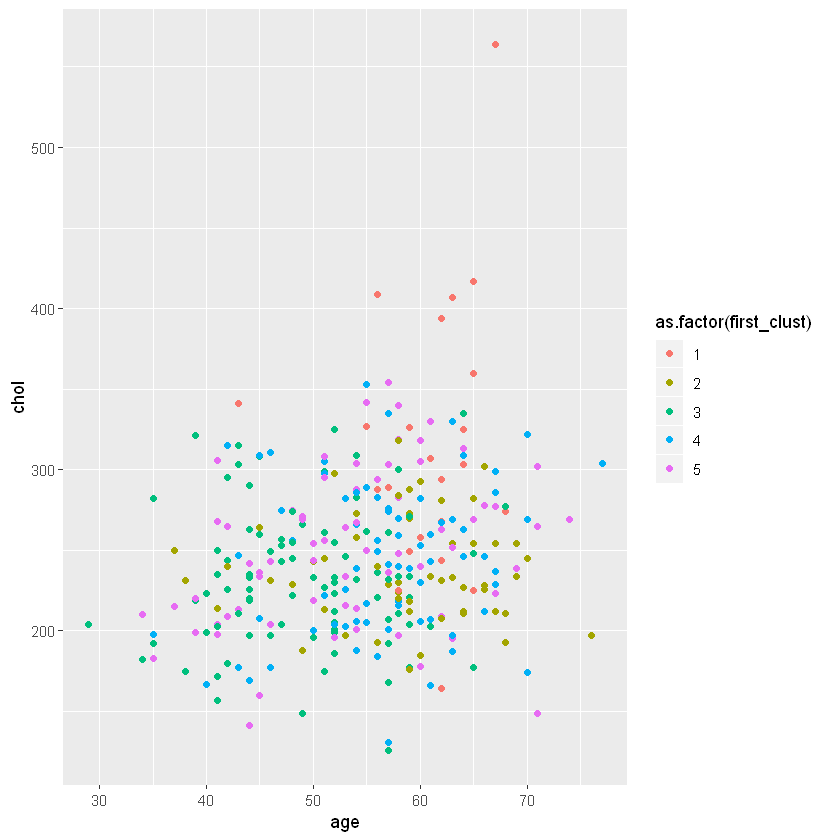

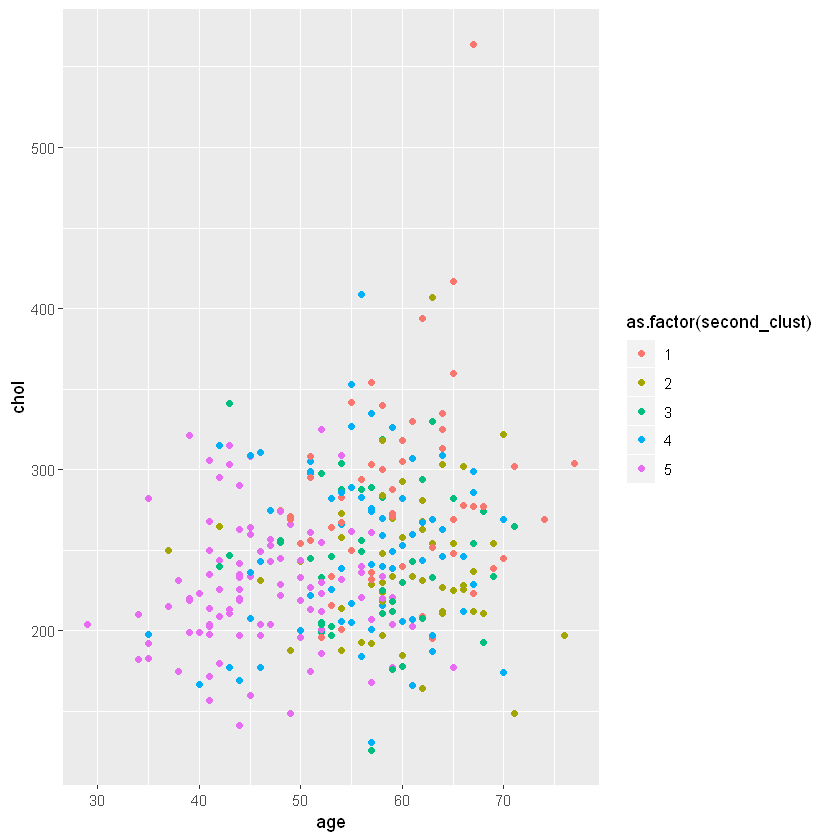

In [7]:
# Adding cluster assignments to the data
heart_disease['first_clust'] = first_clust$cluster
heart_disease['second_clust'] = second_clust$cluster

# Load ggplot2
library(ggplot2)

# Creating the plots of age and chol for the first clustering algorithm
plot_one = ggplot(heart_disease, aes(x=age, y=chol, color=as.factor(first_clust))) + geom_point()
plot_one 

# Creating the plots of age and chol for the second clustering algorithm
plot_two = ggplot(heart_disease, aes(x=age, y=chol, color=as.factor(second_clust))) + geom_point()
plot_two

## 6. Hierarchical clustering: another clustering approach

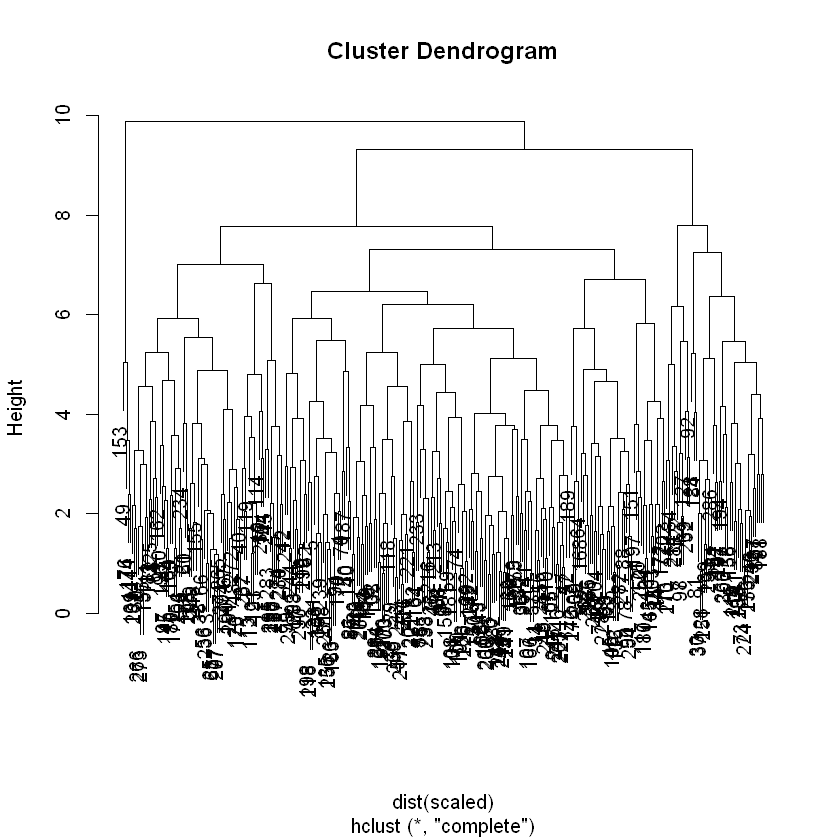

In [8]:

# Executing hierarchical clustering with complete linkage
hier_clust_1 = hclust(dist(scaled), method= "complete")

# Printing the dendrogram
plot(hier_clust_1)

# Getting cluster assignments based on number of selected clusters
hc_1_assign <- cutree(hier_clust_1, 5)

## 7. Hierarchical clustering round two

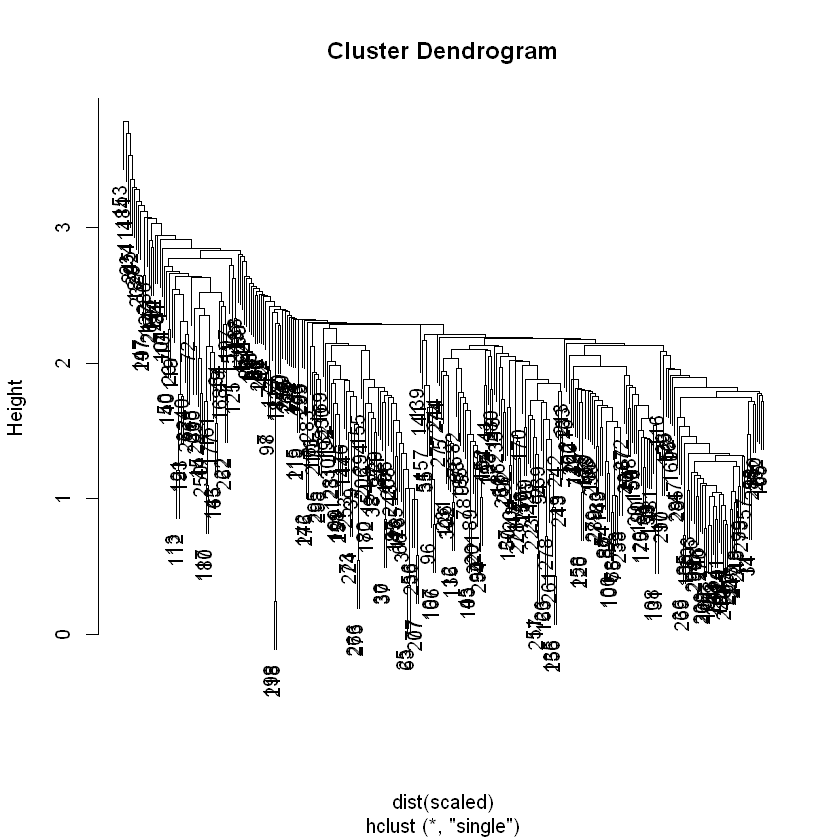

In [9]:
# Executing hierarchical clustering with single linkage
hier_clust_2 = hclust(dist(scaled), method="single")

# Printing the dendrogram
plot(hier_clust_2)

# Getting cluster assignments based on number of selected clusters
hc_2_assign <- cutree(hier_clust_2, 5)

## 8. Comparing clustering results

In [10]:

# Adding assignments of chosen hierarchical linkage
heart_disease['hc_clust'] = hc_1_assign

# Remove 'sex', 'first_clust', and 'second_clust' variables
hd_simple = heart_disease[, !(names(heart_disease) %in% c('sex', 'first_clust', 'second_clust'))]

# Getting mean and standard deviation summary statistics
clust_summary = do.call(data.frame, aggregate(. ~ hc_clust, data = hd_simple, function(x) c(avg = mean(x), sd = sd(x))))
clust_summary

hc_clust,age.avg,age.sd,cp.avg,cp.sd,trestbps.avg,trestbps.sd,chol.avg,chol.sd,fbs.avg,...,restecg.avg,restecg.sd,thalach.avg,thalach.sd,exang.avg,exang.sd,oldpeak.avg,oldpeak.sd,slope.avg,slope.sd
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,51.41667,8.540979,2.783333,0.9470625,129.1389,15.93800,239.8722,42.29228,0.1222222,...,0.8444444,0.9905826,161.5722,15.779214,0.07777778,0.2685686,0.555000,0.7847196,1.388889,0.5730336
2,58.11111,7.754246,3.763889,0.6165112,130.0417,13.90657,253.2222,49.74476,0.1805556,...,1.4027778,0.9140488,135.5417,17.991342,0.81944444,0.3873488,1.451389,1.0804268,1.750000,0.5240686
3,61.00000,3.908034,3.916667,0.2886751,168.5000,17.45904,284.9167,53.00336,0.3333333,...,1.2500000,0.9653073,147.7500,13.157266,0.75000000,0.4522670,2.316667,1.4708274,2.166667,0.5773503
4,59.00000,9.203580,3.571429,0.8501112,134.7714,18.64070,233.8571,49.67136,0.1428571,...,0.6857143,0.9321521,116.8857,17.842071,0.48571429,0.5070926,2.240000,1.3856831,2.200000,0.4058397
5,64.75000,2.061553,3.250000,0.5000000,138.7500,18.42779,433.7500,89.93470,0.2500000,...,2.0000000,0.0000000,156.2500,3.774917,0.00000000,0.0000000,1.100000,0.3829708,1.500000,0.5773503


## 9. Visualizing the cluster contents

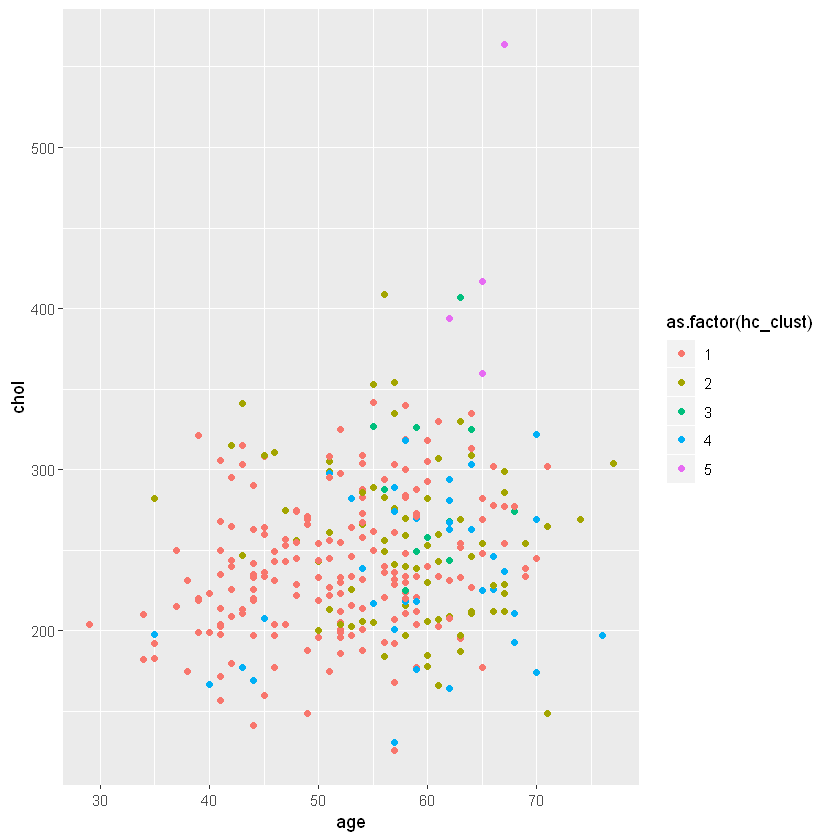

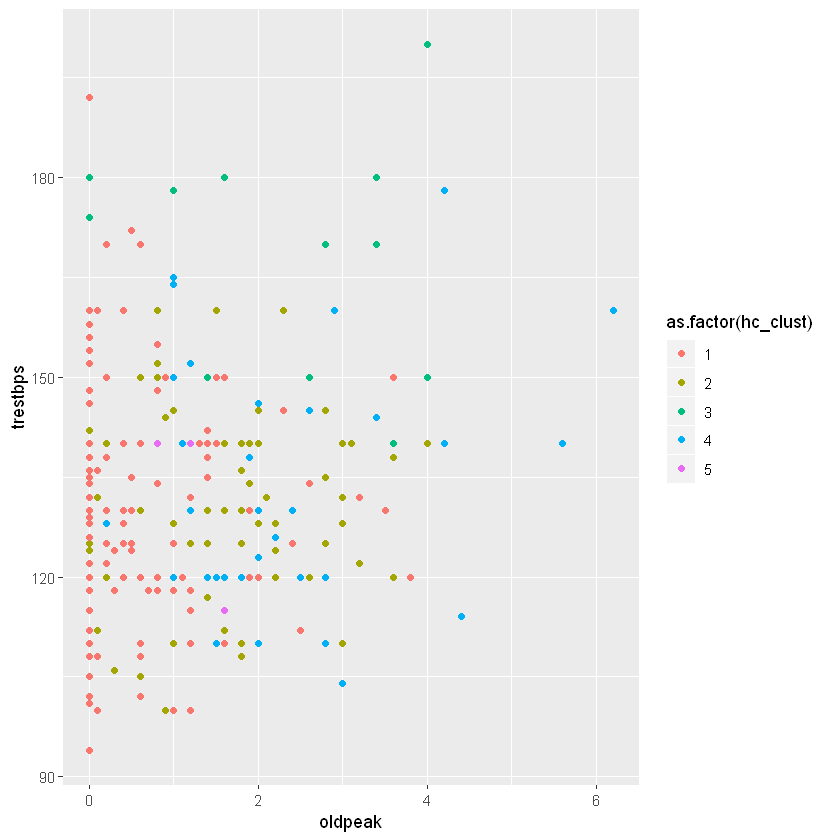

In [11]:

# Plotting age and chol
plot_one = ggplot(heart_disease, aes(x = age, y = chol, color = as.factor(hc_clust))) + 
  geom_point()
plot_one 

# Plotting oldpeak and trestbps
plot_two = ggplot(heart_disease, aes(x = oldpeak, y = trestbps, color = as.factor(hc_clust))) + 
  geom_point()
plot_two